![example](images/director_shot.jpeg)

# Project Title

**Authors:** Robert Cauvy
***

## Overview

This project leverages tools from base Python and pandas to provide exploratory data analysis that helps the head of Microsoft's fledgling movie studio decide what type of films to create. The actionable insights have been distilled from data sets provided by IMDB and The Numbers.

## Business Problem

After making the business decision to compete at the Box Office with original content. The new head of the studio must determine which projects should be prioritized for allocating resources. Since this is a brand new movie studio, decision making will rely on public and readily available historical data of past movie releases. Because optimal financial performance is the ultimate objective of this new business division, the analysis will use gross profits and rate of return as the primary metrics for benchmarking variables involving past films' genres, release dates and directors. Using these measurables to provide an unbiased, rational baseline for the studio head to begin with the early planning of the content and release strategy.  Once these key decisions have been approved, further analysis can be conducted. 

## Data Understanding

The data used in this project comes from sources, IMDB and The Numbers database. Specifically the data stored in the files; imdb.title.basics.csv, tn.movie_budgets.csv, imdb.title.crew.csv, imdb.name.basics.csv. After combining data from these sources, financial performance could be pulled from each individual title and used to measure variables surrounding the genre, release and director.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_columns',0)
%matplotlib inline

In [2]:
# Here you run your code to explore the data
import glob, os
fpath = 'zippedData/'
os.listdir(fpath)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
query = fpath+'*gz'

file_list = glob.glob(query)

In [4]:
tables = {}
for file in file_list:
    print('---'*20)
    
    file_name = file.replace('zippedData/','').replace('.','_')
    
    print(file_name)
    
    if '.tsv.gz' in file:
        temp_df = pd.read_csv(file, sep='\t', encoding='latin-1')
    else:
        temp_df = pd.read_csv(file)
    display(temp_df.head(),temp_df.tail())
    
   
    tables[file_name] = temp_df

------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


In [5]:
tn_movie_budgets = tables['tn_movie_budgets_csv_gz'].copy()

In [6]:
imdb_title_basics = tables['imdb_title_basics_csv_gz'].copy()

In [7]:
df = pd.merge(tn_movie_budgets,imdb_title_basics,left_on='movie',right_on='original_title')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,NaN
3533,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,tt6616538,Bang,Bang,2015,NaN,NaN
3534,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [8]:
df[df.duplicated(keep=False,subset=['movie','original_title','domestic_gross'])]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
27,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama"
28,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",tt2363363,Robin Hood,Robin Hood,2013,92.0,"Action,Drama"
29,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller"
30,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",tt6858500,Robin Hood,Robin Hood,2018,NaN,NaN
31,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",tt8558276,Robin Hood,Robin Hood,2017,60.0,"Action,Adventure,History"
...,...,...,...,...,...,...,...,...,...,...,...,...
3521,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,tt2309562,Ten,Ten,2013,118.0,Drama
3522,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,tt2496400,Ten,Ten,2014,83.0,"Adventure,Horror,Mystery"
3523,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,tt6415838,Ten,Ten,2017,82.0,"Horror,Mystery,Thriller"
3531,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt1872026,Cure,Cure,2011,93.0,Drama


In [9]:
df = df.drop_duplicates(keep='first',subset=['movie','original_title','domestic_gross'])
df[df.duplicated(keep=False,subset=['movie','original_title','domestic_gross'])]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3531,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt1872026,Cure,Cure,2011,93.0,Drama
3533,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,tt6616538,Bang,Bang,2015,NaN,NaN
3534,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [10]:
#Change financial data from strings to integers 

cols_to_ints  = ['worldwide_gross', 'production_budget', 'domestic_gross']

for col in cols_to_ints:
        

    df[col] = df[col].str.replace('$','').str.replace(',','')
    df[col] = df[col].astype(int)

<ipython-input-10-51b791efe809>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace('$','').str.replace(',','')
<ipython-input-10-51b791efe809>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 3536
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2330 non-null   int64  
 1   release_date       2330 non-null   object 
 2   movie              2330 non-null   object 
 3   production_budget  2330 non-null   int64  
 4   domestic_gross     2330 non-null   int64  
 5   worldwide_gross    2330 non-null   int64  
 6   tconst             2330 non-null   object 
 7   primary_title      2330 non-null   object 
 8   original_title     2330 non-null   object 
 9   start_year         2330 non-null   int64  
 10  runtime_minutes    2152 non-null   float64
 11  genres             2304 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 236.6+ KB


In [12]:
df.describe().round()

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
count,2330.0,2330.0,2330.0,2.330000e+03,2330.0,2152.0
mean,51.0,35417776.0,44188644.0,1.060264e+08,2014.0,102.0
std,29.0,48698585.0,74018813.0,2.004444e+08,3.0,23.0
min,1.0,1400.0,0.0,0.000000e+00,2010.0,1.0
25%,26.0,5000000.0,584522.0,2.462218e+06,2011.0,90.0
50%,50.0,18000000.0,17670920.0,3.037390e+07,2014.0,101.0
75%,75.0,42000000.0,54238752.0,1.084234e+08,2016.0,114.0
max,100.0,410600000.0,700059566.0,2.208208e+09,2021.0,189.0


In [13]:
#Create the a column for the 1st financial metric, Gross Profit
df['gross_profit'] = df['worldwide_gross'] - df['production_budget']

<ipython-input-13-3248f1c5bc50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross_profit'] = df['worldwide_gross'] - df['production_budget']


In [14]:
#Create the a column for the 2nd financial metric, ROI
df['ROI'] = (df['gross_profit'] / df['production_budget']) * 100
df

<ipython-input-14-169206228343>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROI'] = (df['gross_profit'] / df['production_budget']) * 100


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,gross_profit,ROI
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",635063875,154.667286
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-200237650,-57.210757
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",1072413963,324.384139
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",1748134200,582.711400
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",355945209,118.648403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,68,"Jul 6, 2001",Cure,10000,94596,94596,tt1872026,Cure,Cure,2011,93.0,Drama,84596,845.960000
3533,70,"Apr 1, 1996",Bang,10000,527,527,tt6616538,Bang,Bang,2015,NaN,NaN,-9473,-94.730000
3534,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",-4416,-49.066667
3535,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",-7000,-100.000000


In [15]:
## Add release month and years columns - convert to pd.datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year
df['release_quarter'] = df['release_date'].dt.quarter
df

<ipython-input-15-e2e06a4560b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'])
<ipython-input-15-e2e06a4560b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_month'] = df['release_date'].dt.month
<ipython-input-15-e2e06a4560b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,2
1,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,2
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,2
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",1748134200,582.711400,4,2018,2
4,9,2017-11-17,Justice League,300000000,229024295,655945209,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",355945209,118.648403,11,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,68,2001-07-06,Cure,10000,94596,94596,tt1872026,Cure,Cure,2011,93.0,Drama,84596,845.960000,7,2001,3
3533,70,1996-04-01,Bang,10000,527,527,tt6616538,Bang,Bang,2015,NaN,NaN,-9473,-94.730000,4,1996,2
3534,73,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",-4416,-49.066667,1,2012,1
3535,78,2018-12-31,Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",-7000,-100.000000,12,2018,4


In [16]:
#Let's remove some unnecessary columns
df.drop(['id','primary_title','original_title','start_year'],axis=1,inplace=True)


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
#How far back does the data go?
df[df.release_year == df.release_year.min()]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter
2217,1915-02-08,The Birth of a Nation,110000,10000000,11000000,tt4196450,120.0,"Biography,Drama,History",10890000,9900.0,2,1915,1


In [18]:
#1915! Let's remove some of the older data points for a more modern representation 
#Remove Movies Older Than 50 Years - drops 31 records and leaves 2299
df_modern = df[df['release_year'] > 1970]
df_modern

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,2
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,2
2,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,141.0,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,2
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",1748134200,582.711400,4,2018,2
4,2017-11-17,Justice League,300000000,229024295,655945209,tt0974015,120.0,"Action,Adventure,Fantasy",355945209,118.648403,11,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,2001-07-06,Cure,10000,94596,94596,tt1872026,93.0,Drama,84596,845.960000,7,2001,3
3533,1996-04-01,Bang,10000,527,527,tt6616538,NaN,NaN,-9473,-94.730000,4,1996,2
3534,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,95.0,"Comedy,Drama",-4416,-49.066667,1,2012,1
3535,2018-12-31,Red 11,7000,0,0,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-7000,-100.000000,12,2018,4


In [19]:
df_modern['big_budget'] = df_modern['production_budget'] >= 1000000
df_modern['profitable'] = df_modern['gross_profit'] > 0
df_modern

<ipython-input-19-1cdfdd7f4ec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modern['big_budget'] = df_modern['production_budget'] >= 1000000
<ipython-input-19-1cdfdd7f4ec4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modern['profitable'] = df_modern['gross_profit'] > 0


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter,big_budget,profitable
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,2,True,True
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,2,True,False
2,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,141.0,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,2,True,True
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",1748134200,582.711400,4,2018,2,True,True
4,2017-11-17,Justice League,300000000,229024295,655945209,tt0974015,120.0,"Action,Adventure,Fantasy",355945209,118.648403,11,2017,4,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,2001-07-06,Cure,10000,94596,94596,tt1872026,93.0,Drama,84596,845.960000,7,2001,3,False,True
3533,1996-04-01,Bang,10000,527,527,tt6616538,NaN,NaN,-9473,-94.730000,4,1996,2,False,False
3534,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,95.0,"Comedy,Drama",-4416,-49.066667,1,2012,1,False,False
3535,2018-12-31,Red 11,7000,0,0,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-7000,-100.000000,12,2018,4,False,False


In [20]:
features = df_modern.drop(columns=['profitable','ROI','big_budget',
                            'release_year','release_month','release_quarter'])
ft_corr = features.corrwith(df_modern['gross_profit']).to_frame('Correlation')

In [21]:
ft_corr.sort_values('Correlation',ascending=False,inplace=True)

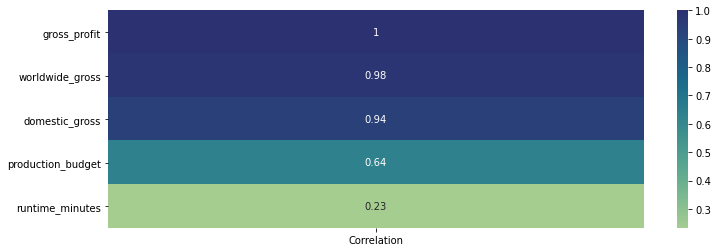

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.heatmap(ft_corr,cmap='crest',annot=True);

In [23]:
def millions(x,pos):
    return f"${int(x*1e-6):,}M"

price_fmt_mill = FuncFormatter(millions)

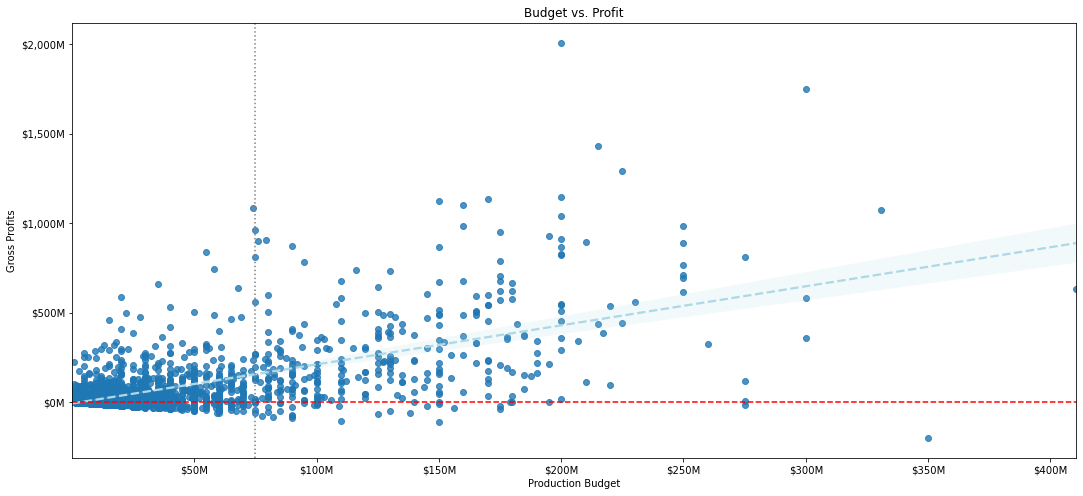

In [24]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.regplot(data=df_modern,ax=ax,x='production_budget',y='gross_profit',
            line_kws={'color':'lightblue','ls':'--'})
ax.set(xlabel="Production Budget",ylabel="Gross Profits",title="Budget vs. Profit")
ax.axhline(0,color='red',linestyle='--')
ax.axvline(75000000,color='grey',ls=':')

ax.yaxis.set_major_formatter(price_fmt_mill)
ax.xaxis.set_major_formatter(price_fmt_mill);

#### 91% of all movies with production budgets over $75M are commercially successful 

##### While those with budgets under $50M are only 56% profitable 

# Are Profits Impacted By Release Month?

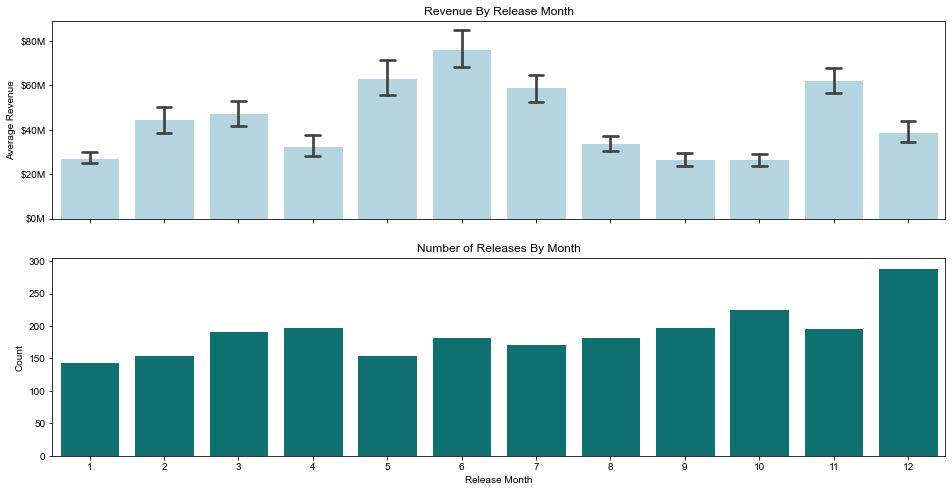

In [25]:
fig, axes = plt.subplots(figsize=(16, 8),nrows=2, sharex=True)

sns.set(style="darkgrid")
sns.barplot(data=df_modern,x='release_month',y='domestic_gross',capsize=.2,ci=68,color='lightblue',ax=axes[0])
sns.countplot(data=df_modern,x='release_month',color='teal',ax=axes[1])
axes[0].set(title='Revenue By Release Month', xlabel=None, ylabel='Average Revenue')
axes[1].set(title='Number of Releases By Month',ylabel='Count',xlabel='Release Month')
axes[0].yaxis.set_major_formatter(price_fmt_mill);

Yes! On average, movies opening in May, June, July and November are the most successful.

### Should any release months be avoided?

Yes, April, September, October and December have the most releases.

And as we saw above, those months also average low revenues.

# What film genres should be prioritized?

In [26]:
df_genres = df_modern.copy()
df_genres['genres_list'] = df_genres['genres'].str.split(pat=',')
df_genres.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter,big_budget,profitable,genres_list
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,2,True,True,"[Action, Adventure, Fantasy]"
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,2,True,False,"[Action, Adventure, Sci-Fi]"
2,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,141.0,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,2,True,True,"[Action, Adventure, Sci-Fi]"
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",1748134200,582.711400,4,2018,2,True,True,"[Action, Adventure, Sci-Fi]"
4,2017-11-17,Justice League,300000000,229024295,655945209,tt0974015,120.0,"Action,Adventure,Fantasy",355945209,118.648403,11,2017,4,True,True,"[Action, Adventure, Fantasy]"


In [155]:
df_genres = df_genres.explode('genres_list')
df_genres

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter,big_budget,profitable,genres_list
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136,"Action,Adventure,Fantasy",635063875,155,5,2011,2,True,True,Action
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136,"Action,Adventure,Fantasy",635063875,155,5,2011,2,True,True,Adventure
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136,"Action,Adventure,Fantasy",635063875,155,5,2011,2,True,True,Fantasy
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113,"Action,Adventure,Sci-Fi",-200237650,-57,6,2019,2,True,False,Action
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113,"Action,Adventure,Sci-Fi",-200237650,-57,6,2019,2,True,False,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,2018-12-31,Red 11,7000,0,0,tt7837402,77,"Horror,Sci-Fi,Thriller",-7000,-100,12,2018,4,False,False,Sci-Fi
3535,2018-12-31,Red 11,7000,0,0,tt7837402,77,"Horror,Sci-Fi,Thriller",-7000,-100,12,2018,4,False,False,Thriller
3536,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,76,"Drama,Horror,Thriller",-1400,-100,9,2015,3,False,False,Drama
3536,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,76,"Drama,Horror,Thriller",-1400,-100,9,2015,3,False,False,Horror


In [318]:
genre_order = list(df_genres.groupby(['genres_list']).mean()['ROI'].sort_values(ascending=False).index)

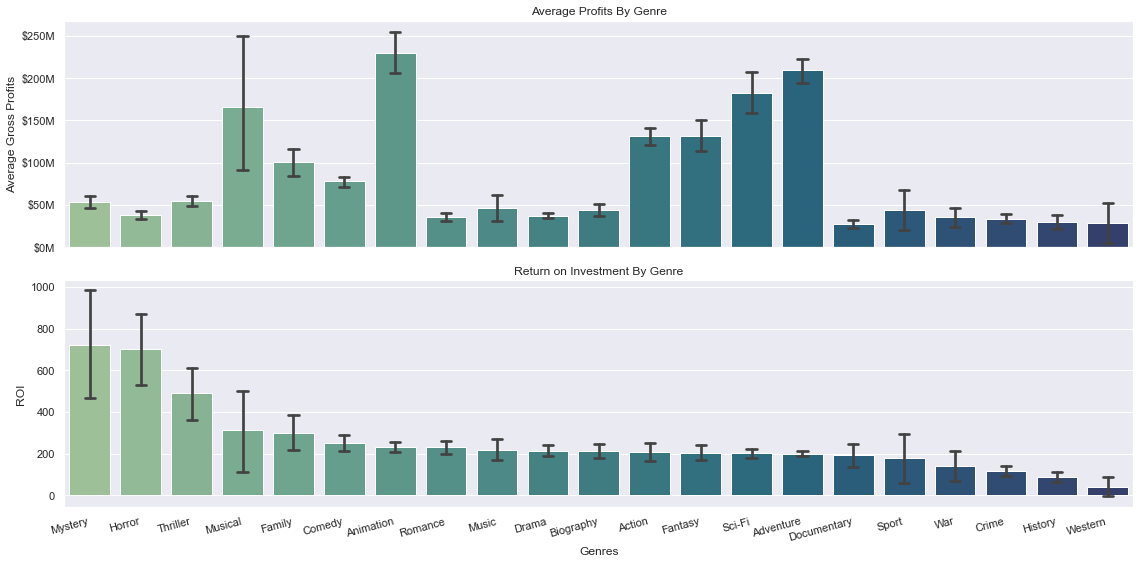

In [319]:
fig, axes = plt.subplots(figsize=(16, 8),nrows=2,sharex=True)


palette = sns.color_palette("crest",len(genre_order))
sns.barplot(data=df_genres,y='gross_profit',x='genres_list', ax=axes[0], 
            order=genre_order,capsize=.2, ci=68, palette=palette)
sns.barplot(data=df_genres,y='ROI',x='genres_list', ax=axes[1], 
            order=genre_order,capsize=.2, ci=68, palette=palette)

axes[0].set(xlabel=None, ylabel='Average Gross Profits',
            title='Average Profits By Genre')
axes[1].set(xlabel='Genres', ylabel='ROI',
            title='Return on Investment By Genre')

axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=15,ha='right')
axes[0].yaxis.set_major_formatter(price_fmt_mill)
plt.tight_layout();



In [202]:
from collections import Counter

In [ ]:
top_genres = ['Animation','Adventure','Sci-Fi','Musical','Fantasy','Action','Family','Comedy']
top_genres_df = df_genres[df_genres['genres_list'].isin(top_genres)]
top_genres_df

In [321]:
top_genres_roi = ['Mystery','Horror','Thriller','Musical','Family','Comedy','Animation','Romance']
top_genres_roi_df = df_genres[df_genres['genres_list'].isin(top_genres_roi)]
top_genres_roi_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter,big_budget,profitable,genres_list
5,2015-11-06,Spectre,300000000,200074175,879620923,tt2379713,148,"Action,Adventure,Thriller",579620923,193,11,2015,4,True,True,Thriller
6,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,tt1345836,164,"Action,Thriller",809439099,294,7,2012,3,True,True,Thriller
10,2010-11-24,Tangled,260000000,200821936,586477240,tt0398286,100,"Adventure,Animation,Comedy",326477240,126,11,2010,4,True,True,Animation
10,2010-11-24,Tangled,260000000,200821936,586477240,tt0398286,100,"Adventure,Animation,Comedy",326477240,126,11,2010,4,True,True,Comedy
13,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,tt0903624,169,"Adventure,Family,Fantasy",767003568,307,12,2012,4,True,True,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,95,"Comedy,Drama",-4416,-49,1,2012,1,False,False,Comedy
3535,2018-12-31,Red 11,7000,0,0,tt7837402,77,"Horror,Sci-Fi,Thriller",-7000,-100,12,2018,4,False,False,Horror
3535,2018-12-31,Red 11,7000,0,0,tt7837402,77,"Horror,Sci-Fi,Thriller",-7000,-100,12,2018,4,False,False,Thriller
3536,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,76,"Drama,Horror,Thriller",-1400,-100,9,2015,3,False,False,Horror


In [266]:
genre_months = top_genres_df.groupby(['release_month','genres_list']).size().unstack()#.value_counts.to_frame('count')
genre_months

genres_list,Action,Adventure,Animation,Comedy,Family,Fantasy,Musical,Sci-Fi
release_month,,,,,,,,
1,47,22,5,41,9,12,nan,8
2,42,28,9,37,4,13,1,9
3,49,43,11,51,17,19,2,17
4,40,23,7,62,12,10,nan,18
5,43,40,5,47,7,12,1,18
6,54,49,15,62,6,14,2,20
7,50,45,12,65,11,12,1,23
8,51,29,10,52,9,11,1,8
9,49,23,10,46,6,1,1,13


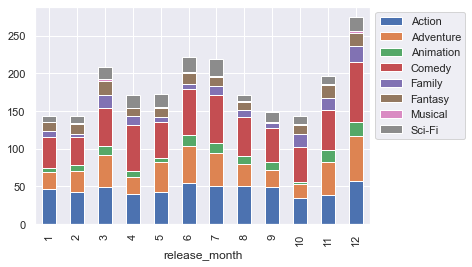

In [267]:
ax = genre_months.plot.bar(stacked=True,);
ax.legend(bbox_to_anchor=[1,1]);

In [ ]:
# import plotly.express as px

# fig = px.bar(df_genres, x="release_month", color="genres_list")
# fig.show()

In [ ]:


# g = sns.catplot(data=df_genres,x='release_month',kind='bar',hue='genres_list',palette='magma')
# g.set(ylabel="Count", xlabel="Month of Release",
#       title="Total Releases By Genre By Month");

In [ ]:
# g = sns.displot(data=df_genres,x='release_month',aspect=1.5,bins=12,
#                 hue='genres_list',height=9,palette='magma')
# g.set(ylabel="Count", xlabel="Month of Release",
#       title="Total Releases By Genre By Month");

In [256]:
# #fig, ax = plt.subplots(figsize=(12, 6),nrows=7,ncols=3)

# # for genre in genre_order:
# g = sns.lmplot(data=top_genres_df, y='gross_profit',x='production_budget',
#            hue='genres_list',col='genres_list',col_wrap=3);

    

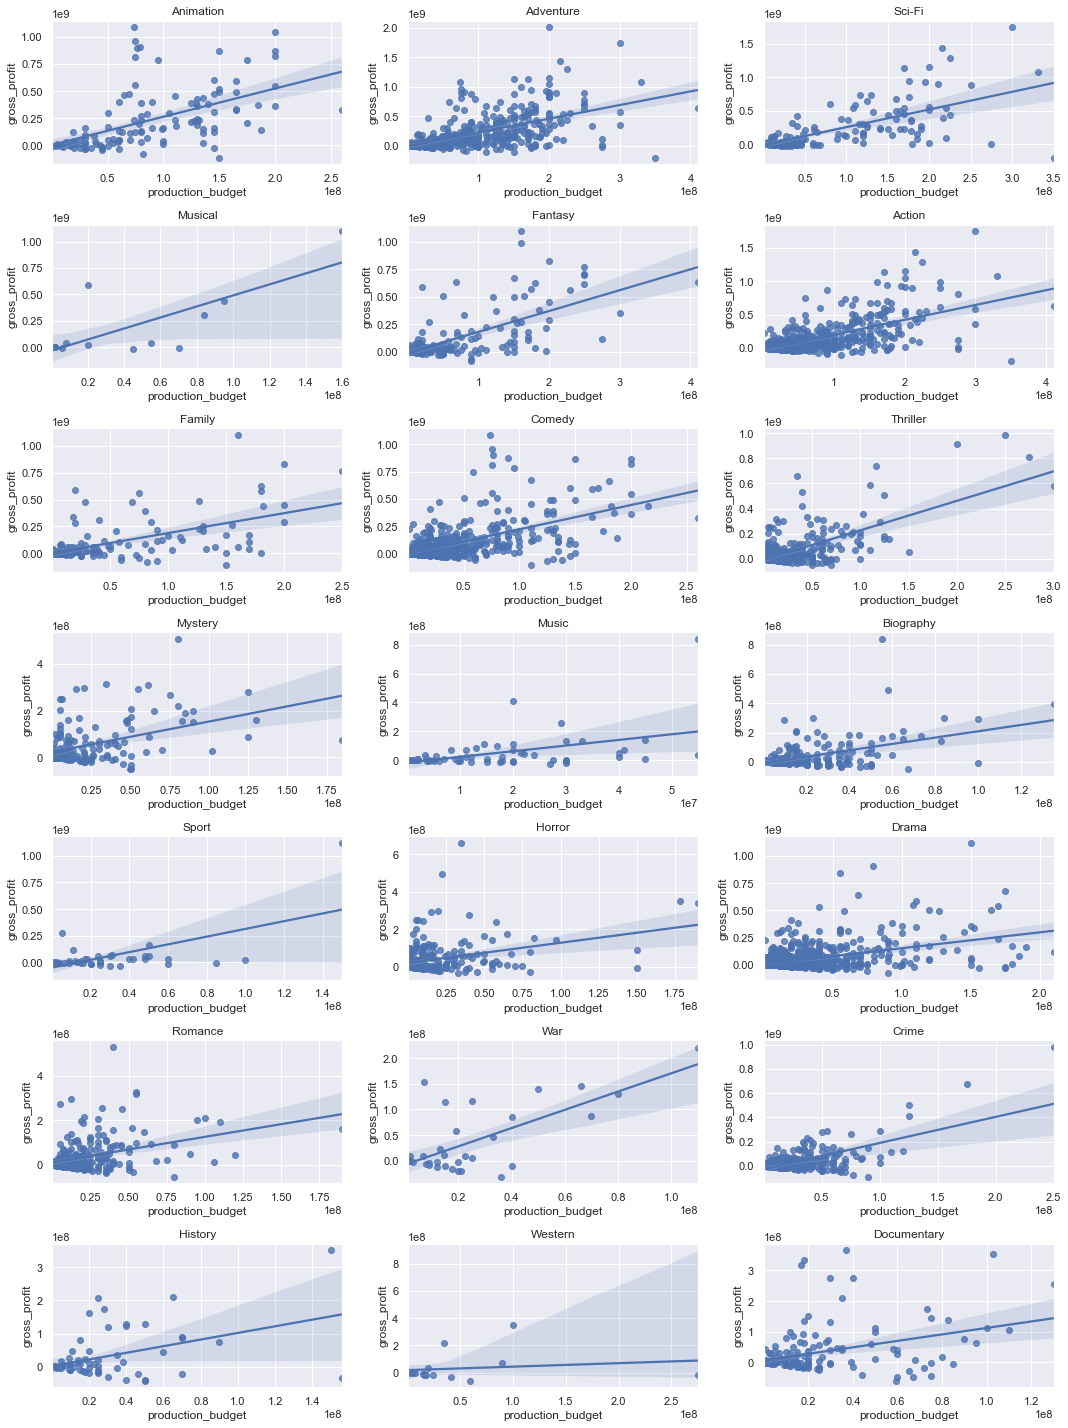

In [136]:
fig, ax = plt.subplots(figsize=(15, 20),nrows=7,ncols=3)
ax = ax.flatten()

for i, genre in enumerate(genre_order):
    plot_df = df_genres[df_genres['genres_list'] == genre]
    sns.regplot(data=plot_df, y='gross_profit',x='production_budget',
                ax=ax[i]);
    ax[i].set_title(genre)
plt.tight_layout()

    

In [295]:
# sns.lmplot(data=top_genres_df,x='production_budget',y='gross_profit',
#            hue='genres_list',line_kws={'color':'lightblue','ls':'--'},
#            fit_reg=False,height=8,aspect=2,palette='magma',hue_order=top_genres);


In [294]:
import plotly.express as px
df = df_genres
fig = px.scatter(top_genres_df,x='production_budget',y='gross_profit',height=700,width=1010,trendline='ols',title='Profit Against Budget By Top Genres',color='genres_list',hover_name='movie');

fig.show()

# Who are the key film crew members behind the top box office hits?

In [52]:
# Merge principals table with df_modern to merge mconst
imdb_crew = tables['imdb_title_crew_csv_gz']
df_crew = pd.merge(df_modern,imdb_crew,on='tconst')
df_crew

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter,big_budget,profitable,directors,writers
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,2,True,True,nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627"
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,2,True,False,nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456..."
2,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,141.0,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,2,True,True,nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687"
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",1748134200,582.711400,4,2018,2,True,True,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800..."
4,2017-11-17,Justice League,300000000,229024295,655945209,tt0974015,120.0,"Action,Adventure,Fantasy",355945209,118.648403,11,2017,4,True,True,nm0811583,"nm0796950,nm0795975,nm0006516,nm0811583,nm0923..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,2001-07-06,Cure,10000,94596,94596,tt1872026,93.0,Drama,84596,845.960000,7,2001,3,False,True,nm0948107,NaN
2295,1996-04-01,Bang,10000,527,527,tt6616538,NaN,NaN,-9473,-94.730000,4,1996,2,False,False,"nm5674664,nm4419546","nm4419546,nm5674664"
2296,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,95.0,"Comedy,Drama",-4416,-49.066667,1,2012,1,False,False,nm0122653,nm0122653
2297,2018-12-31,Red 11,7000,0,0,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-7000,-100.000000,12,2018,4,False,False,nm0001675,"nm1897406,nm0001675"


In [53]:
df_crew['director_list'] = df_crew['directors'].str.split(pat=',')

In [54]:
df_directors = df_crew.explode('director_list')
df_directors

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter,big_budget,profitable,directors,writers,director_list
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,2,True,True,nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",nm0551128
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,2,True,False,nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",nm1334526
2,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,141.0,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,2,True,True,nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",1748134200,582.711400,4,2018,2,True,True,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",nm0751577
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,149.0,"Action,Adventure,Sci-Fi",1748134200,582.711400,4,2018,2,True,True,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",nm0751648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,1996-04-01,Bang,10000,527,527,tt6616538,NaN,NaN,-9473,-94.730000,4,1996,2,False,False,"nm5674664,nm4419546","nm4419546,nm5674664",nm4419546
2296,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,95.0,"Comedy,Drama",-4416,-49.066667,1,2012,1,False,False,nm0122653,nm0122653,nm0122653
2297,2018-12-31,Red 11,7000,0,0,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-7000,-100.000000,12,2018,4,False,False,nm0001675,"nm1897406,nm0001675",nm0001675
2298,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,76.0,"Drama,Horror,Thriller",-1400,-100.000000,9,2015,3,False,False,"nm4766951,nm5792320",nm4766951,nm4766951


In [55]:
#Merge nconst with wirter and director names
imdb_names_basics = tables['imdb_name_basics_csv_gz']
df_directors = pd.merge(df_directors,imdb_names_basics,
                        left_on='director_list',right_on='nconst')

df_directors

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,gross_profit,ROI,release_month,release_year,release_quarter,big_budget,profitable,directors,writers,director_list,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,2,True,True,nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",nm0551128,nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
1,2018-12-19,Mary Poppins Returns,130000000,171958438,341528518,tt5028340,130.0,"Comedy,Family,Fantasy",211528518,162.714245,12,2018,4,True,True,nm0551128,"nm0871308,nm1341735,nm0551128,nm0217896",nm0551128,nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
2,2014-12-25,Into the Woods,56200000,128002372,213116401,tt2180411,125.0,"Adventure,Comedy,Drama",156916401,279.210678,12,2014,4,True,True,nm0551128,nm0487567,nm0551128,nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer","tt2180411,tt0299658,tt0875034,tt5028340"
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,2,True,False,nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",nm1334526,nm1334526,Simon Kinberg,1973.0,NaN,"producer,writer,director","tt1502712,tt3315342,tt1877832,tt3659388"
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,141.0,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,2,True,True,nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,1996-04-01,Bang,10000,527,527,tt6616538,NaN,NaN,-9473,-94.730000,4,1996,2,False,False,"nm5674664,nm4419546","nm4419546,nm5674664",nm5674664,nm5674664,Zarina Tadjibaeva,NaN,NaN,"actress,producer,director","tt6616538,tt2916872,tt4649558,tt7372794"
2518,1996-04-01,Bang,10000,527,527,tt6616538,NaN,NaN,-9473,-94.730000,4,1996,2,False,False,"nm5674664,nm4419546","nm4419546,nm5674664",nm4419546,nm4419546,Uwe Schwarzwalder,NaN,NaN,"actor,sound_department,producer","tt0457396,tt4326556,tt4649558,tt1204342"
2519,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,95.0,"Comedy,Drama",-4416,-49.066667,1,2012,1,False,False,nm0122653,nm0122653,nm0122653,nm0122653,Edward Burns,1968.0,NaN,"actor,writer,producer","tt0117628,tt0491109,tt0120815,tt0112585"
2520,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,76.0,"Drama,Horror,Thriller",-1400,-100.000000,9,2015,3,False,False,"nm4766951,nm5792320",nm4766951,nm4766951,nm4766951,Benjamin Roberds,NaN,NaN,"camera_department,director,writer",tt2107644


In [56]:
df_directors.drop(['release_quarter','release_date','runtime_minutes',
                    'release_quarter','birth_year','death_year','directors',
                   'writers','director_list','primary_profession',
                    'known_for_titles'],axis=1,inplace=True)
df_directors

,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,gross_profit,ROI,release_month,release_year,big_budget,profitable,nconst,primary_name
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,True,True,nm0551128,Rob Marshall
1,Mary Poppins Returns,130000000,171958438,341528518,tt5028340,"Comedy,Family,Fantasy",211528518,162.714245,12,2018,True,True,nm0551128,Rob Marshall
2,Into the Woods,56200000,128002372,213116401,tt2180411,"Adventure,Comedy,Drama",156916401,279.210678,12,2014,True,True,nm0551128,Rob Marshall
3,Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,True,False,nm1334526,Simon Kinberg
4,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,True,True,nm0923736,Joss Whedon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,Bang,10000,527,527,tt6616538,NaN,-9473,-94.730000,4,1996,False,False,nm5674664,Zarina Tadjibaeva
2518,Bang,10000,527,527,tt6616538,NaN,-9473,-94.730000,4,1996,False,False,nm4419546,Uwe Schwarzwalder
2519,Newlyweds,9000,4584,4584,tt1880418,"Comedy,Drama",-4416,-49.066667,1,2012,False,False,nm0122653,Edward Burns
2520,A Plague So Pleasant,1400,0,0,tt2107644,"Drama,Horror,Thriller",-1400,-100.000000,9,2015,False,False,nm4766951,Benjamin Roberds


In [129]:
pd.options.display.float_format = '{:.0f}'.format


In [130]:
# Top Directors By Profit
dir_names = df_directors.groupby(['primary_name']).mean().round()
top_dirs_profit = dir_names.sort_values('gross_profit',ascending=False).head(15)
top_dirs_profit

,production_budget,domestic_gross,worldwide_gross,gross_profit,ROI,release_month,release_year,big_budget,profitable
primary_name,,,,,,,,,
Kevin Lincoln,200000000,659363944,2208208395,2008208395,1004,12,1997,1,1
Pete Meads,200000000,659363944,2208208395,2008208395,1004,12,1997,1,1
Adam Green,150000000,400738009,1272469910,1122469910,748,11,2013,1,1
Anthony Russo,240000000,448882263,1300868501,1060868501,420,4,2016,1,1
Joe Russo,240000000,448882263,1300868501,1060868501,420,4,2016,1,1
Kyle Balda,74500000,300335035,1097531962,1023031962,1374,6,2016,1,1
Eric Guillon,75000000,264624300,1034727750,959727750,1280,6,2017,1,1
Jared Bush,150000000,341268248,1019429616,869429616,580,3,2016,1,1
Lee Unkrich,200000000,415004880,1068879522,868879522,434,6,2010,1,1


In [131]:
# Top Directors By ROI
dir_names = df_directors.groupby(['primary_name']).mean()
top_dirs_roi = dir_names.sort_values('ROI',ascending=False).head(15)
top_dirs_roi

,production_budget,domestic_gross,worldwide_gross,gross_profit,ROI,release_month,release_year,big_budget,profitable
primary_name,,,,,,,,,
Chris Lofing,100000,22764410,41656474,41556474,41556,7,2015,0,1
Travis Cluff,100000,22764410,41656474,41556474,41556,7,2015,0,1
Sujit Mondal,1000000,117235147,225000000,224000000,22400,11,1976,1,1
Joaquin Perea,1000000,53262945,101759490,100759490,10076,1,2012,1,1
Levan Gabriadze,1000000,32789645,64364198,63364198,6336,4,2015,1,1
Brandon Camp,500000,31559560,31559560,31059560,6212,11,1974,0,1
Tod Williams,3000000,84752907,177512032,174512032,5817,10,2010,1,1
Jamie Buckner,5000000,138141585,278964806,273964806,5479,1,2017,1,1
Jordan Peele,5000000,176040665,255367951,250367951,5007,2,2017,1,1


In [132]:
s = top_dirs_profit.style.background_gradient();
s

,production_budget,domestic_gross,worldwide_gross,gross_profit,ROI,release_month,release_year,big_budget,profitable
primary_name,,,,,,,,,
Kevin Lincoln,200000000.000000,659363944.000000,2208208395.000000,2008208395.000000,1004.000000,12.000000,1997.000000,1.000000,1.000000
Pete Meads,200000000.000000,659363944.000000,2208208395.000000,2008208395.000000,1004.000000,12.000000,1997.000000,1.000000,1.000000
Adam Green,150000000.000000,400738009.000000,1272469910.000000,1122469910.000000,748.000000,11.000000,2013.000000,1.000000,1.000000
Anthony Russo,240000000.000000,448882263.000000,1300868501.000000,1060868501.000000,420.000000,4.000000,2016.000000,1.000000,1.000000
Joe Russo,240000000.000000,448882263.000000,1300868501.000000,1060868501.000000,420.000000,4.000000,2016.000000,1.000000,1.000000
Kyle Balda,74500000.000000,300335035.000000,1097531962.000000,1023031962.000000,1374.000000,6.000000,2016.000000,1.000000,1.000000
Eric Guillon,75000000.000000,264624300.000000,1034727750.000000,959727750.000000,1280.000000,6.000000,2017.000000,1.000000,1.000000
Jared Bush,150000000.000000,341268248.000000,1019429616.000000,869429616.000000,580.000000,3.000000,2016.000000,1.000000,1.000000
Lee Unkrich,200000000.000000,415004880.000000,1068879522.000000,868879522.000000,434.000000,6.000000,2010.000000,1.000000,1.000000


In [67]:
s = top_dirs_roi.style.background_gradient();
s

,production_budget,domestic_gross,worldwide_gross,gross_profit,ROI,release_month,release_year,big_budget,profitable
primary_name,,,,,,,,,
Chris Lofing,100000.000000,22764410.000000,41656474.000000,41556474.000000,41556.500000,7.000000,2015.000000,0.000000,1.000000
Travis Cluff,100000.000000,22764410.000000,41656474.000000,41556474.000000,41556.500000,7.000000,2015.000000,0.000000,1.000000
Sujit Mondal,1000000.000000,117235147.000000,225000000.000000,224000000.000000,22400.000000,11.000000,1976.000000,1.000000,1.000000
Joaquin Perea,1000000.000000,53262945.000000,101759490.000000,100759490.000000,10075.900000,1.000000,2012.000000,1.000000,1.000000
Levan Gabriadze,1000000.000000,32789645.000000,64364198.000000,63364198.000000,6336.400000,4.000000,2015.000000,1.000000,1.000000
Brandon Camp,500000.000000,31559560.000000,31559560.000000,31059560.000000,6211.900000,11.000000,1974.000000,0.000000,1.000000
Tod Williams,3000000.000000,84752907.000000,177512032.000000,174512032.000000,5817.100000,10.000000,2010.000000,1.000000,1.000000
Jamie Buckner,5000000.000000,138141585.000000,278964806.000000,273964806.000000,5479.300000,1.000000,2017.000000,1.000000,1.000000
Jordan Peele,5000000.000000,176040665.000000,255367951.000000,250367951.000000,5007.400000,2.000000,2017.000000,1.000000,1.000000


In [73]:
df_directors['genre_list'] = df_directors['genres'].str.split(pat=',')

,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,gross_profit,ROI,release_month,release_year,big_budget,profitable,nconst,primary_name,genre_list
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",635063875,154.667286,5,2011,True,True,nm0551128,Rob Marshall,"[Action, Adventure, Fantasy]"
1,Mary Poppins Returns,130000000,171958438,341528518,tt5028340,"Comedy,Family,Fantasy",211528518,162.714245,12,2018,True,True,nm0551128,Rob Marshall,"[Comedy, Family, Fantasy]"
2,Into the Woods,56200000,128002372,213116401,tt2180411,"Adventure,Comedy,Drama",156916401,279.210678,12,2014,True,True,nm0551128,Rob Marshall,"[Adventure, Comedy, Drama]"
3,Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",-200237650,-57.210757,6,2019,True,False,nm1334526,Simon Kinberg,"[Action, Adventure, Sci-Fi]"
4,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",1072413963,324.384139,5,2015,True,True,nm0923736,Joss Whedon,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,Bang,10000,527,527,tt6616538,NaN,-9473,-94.730000,4,1996,False,False,nm5674664,Zarina Tadjibaeva,NaN
2518,Bang,10000,527,527,tt6616538,NaN,-9473,-94.730000,4,1996,False,False,nm4419546,Uwe Schwarzwalder,NaN
2519,Newlyweds,9000,4584,4584,tt1880418,"Comedy,Drama",-4416,-49.066667,1,2012,False,False,nm0122653,Edward Burns,"[Comedy, Drama]"
2520,A Plague So Pleasant,1400,0,0,tt2107644,"Drama,Horror,Thriller",-1400,-100.000000,9,2015,False,False,nm4766951,Benjamin Roberds,"[Drama, Horror, Thriller]"


In [298]:
df_genre_directors = df_directors.explode('genre_list')
df_genre_directors

,movie,production_budget,domestic_gross,worldwide_gross,tconst,genres,gross_profit,ROI,release_month,release_year,big_budget,profitable,nconst,primary_name,genre_list
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",635063875,155,5,2011,True,True,nm0551128,Rob Marshall,Action
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",635063875,155,5,2011,True,True,nm0551128,Rob Marshall,Adventure
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",635063875,155,5,2011,True,True,nm0551128,Rob Marshall,Fantasy
1,Mary Poppins Returns,130000000,171958438,341528518,tt5028340,"Comedy,Family,Fantasy",211528518,163,12,2018,True,True,nm0551128,Rob Marshall,Comedy
1,Mary Poppins Returns,130000000,171958438,341528518,tt5028340,"Comedy,Family,Fantasy",211528518,163,12,2018,True,True,nm0551128,Rob Marshall,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,A Plague So Pleasant,1400,0,0,tt2107644,"Drama,Horror,Thriller",-1400,-100,9,2015,False,False,nm4766951,Benjamin Roberds,Horror
2520,A Plague So Pleasant,1400,0,0,tt2107644,"Drama,Horror,Thriller",-1400,-100,9,2015,False,False,nm4766951,Benjamin Roberds,Thriller
2521,A Plague So Pleasant,1400,0,0,tt2107644,"Drama,Horror,Thriller",-1400,-100,9,2015,False,False,nm5792320,Jordan Reyes,Drama
2521,A Plague So Pleasant,1400,0,0,tt2107644,"Drama,Horror,Thriller",-1400,-100,9,2015,False,False,nm5792320,Jordan Reyes,Horror


In [76]:
top_dirs_by_genre = df_genre_directors.groupby(['genre_list',
                                                'primary_name']).mean()
top_dirs_by_genre

production_budget  ...  profitable
genre_list primary_name                          ...            
Action     Adam Ethan Crow            1600000.0  ...         1.0
           Adam McKay               100000000.0  ...         1.0
           Adam Wingard               1000000.0  ...         1.0
           Agus Pestol               10000000.0  ...         1.0
           Ahsan Rahim                1500000.0  ...         0.0
...                                         ...  ...         ...
Western    Mateo Gil                  4500000.0  ...         0.0
           Matt Piedmont              6000000.0  ...         1.0
           Quentin Tarantino        100000000.0  ...         1.0
           Sngmoo Lee                42000000.0  ...         0.0
           Tommy Lee Jones           16000000.0  ...         0.0

[4840 rows x 9 columns]

In [ ]:
# filter top movies
# use isin function to function

In [ ]:
top_genre_dirs_roi = top_dirs_by_genre.pivot(index='genres_list,''primary_name''ROI',
                                                   ascending=False).head(15)
top_genre_dirs_roi

In [297]:
top_genres_df['genres_list'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Animation', 'Comedy',
       'Family', 'Musical'], dtype=object)

In [308]:
results = {}
for genre in top_genres_df['genres_list'].unique():
    group_df = df_genre_directors.groupby('genre_list').get_group(genre)
    directors = group_df.groupby('primary_name').mean()['gross_profit'].sort_values(ascending=False)
    
    results[genre] = directors.head(10).to_frame().reset_index()
results.keys()

dict_keys(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Animation', 'Comedy', 'Family', 'Musical'])

In [209]:
genre_months = df_genres.groupby(['release_month','genres_list']).size().reset_index(level=1)

In [309]:
results_df = pd.concat(results,axis=1)
results_df

Action               ...              Musical             
      primary_name gross_profit  ...         primary_name gross_profit
0  Colin Trevorrow   1433854864  ...          Bill Condon    843815419
1     Ryan Coogler   1148258224  ...          Brad Dalton    439551353
2      J.A. Bayona   1135772799  ...       Michael Gracey    302665550
3    Anthony Russo   1060868501  ...       Ayan Mukherjee     42527466
4        Joe Russo   1060868501  ...          Steve Antin     35552675
5        James Wan    986894640  ...         Robert Muren     18164784
6       Ryan Fleck    948061550  ...      Elizabeth Muren     18164784
7       Anna Boden    948061550  ...       Ryan McDonough       667524
8      Jake Kasdan    874496193  ...  Darren Lynn Bousman      -500000
9      Joss Whedon    784645092  ...    Jeffrey St. Jules     -1000000

[10 rows x 16 columns]

In [322]:
top_genres_roi_df['genres_list'].unique()

array(['Thriller', 'Animation', 'Comedy', 'Family', 'Horror', 'Romance',
       'Mystery', 'Musical'], dtype=object)

In [323]:
results2 = {}
for genre in top_genres_roi_df['genres_list'].unique():
    group_df = df_genre_directors.groupby('genre_list').get_group(genre)
    directors = group_df.groupby('primary_name').mean()['ROI'].sort_values(ascending=False)
    
    results2[genre] = directors.head(10).to_frame().reset_index()
results2.keys()

dict_keys(['Thriller', 'Animation', 'Comedy', 'Family', 'Horror', 'Romance', 'Mystery', 'Musical'])

In [324]:
results2_df = pd.concat(results2,axis=1)
results2_df

Thriller                   Animation  ... Mystery          Musical     
         primary_name   ROI          primary_name  ...     ROI     primary_name  ROI
0        Chris Lofing 41556            Kyle Balda  ...   41556      Bill Condon 1815
1        Travis Cluff 41556          Eric Guillon  ...   41556   Ayan Mukherjee  512
2       Joaquin Perea 10076         Pierre Coffin  ...    6336      Brad Dalton  463
3        Chris Stokes  9458           Jon Favreau  ...    5007   Michael Gracey  360
4  David Gordon Green  8101         Yarrow Cheney  ...    4141   Ryan McDonough  134
5     Levan Gabriadze  6336          Chris Renaud  ...    4024     Robert Muren   91
6        Jordan Peele  5007        Garth Jennings  ...    3852  Elizabeth Muren   91
7      Bradley Parker  4141  Christophe Lourdelet  ...    3399      Steve Antin   65
8           James Wan  4024             Phil Lord  ...    3399    Adam Shankman  -13
9    John R. Leonetti  3852    Christopher Miller  ...    2618   Mark Gustafson  -30

[10 rows x 16 columns]

In [78]:
top_genre_dirs_roi = top_dirs_by_genre.sort_values('ROI',
                                                   ascending=False).head(15)
top_genre_dirs_roi

production_budget  ...  profitable
genre_list primary_name                           ...            
Mystery    Travis Cluff             1.000000e+05  ...         1.0
           Chris Lofing             1.000000e+05  ...         1.0
Thriller   Chris Lofing             1.000000e+05  ...         1.0
Horror     Chris Lofing             1.000000e+05  ...         1.0
Thriller   Travis Cluff             1.000000e+05  ...         1.0
Horror     Travis Cluff             1.000000e+05  ...         1.0
Drama      Sujit Mondal             1.000000e+06  ...         1.0
Comedy     Sujit Mondal             1.000000e+06  ...         1.0
Action     Sujit Mondal             1.000000e+06  ...         1.0
Thriller   Joaquin Perea            1.000000e+06  ...         1.0
Horror     Joaquin Perea            1.000000e+06  ...         1.0
Thriller   Chris Stokes             2.500000e+05  ...         1.0
Horror     David Gordon Green       8.441667e+06  ...         1.0
Thriller   David Gordon Green       8.441667e+06  ...         1.0
           Levan Gabriadze          1.000000e+06  ...         1.0

[15 rows x 9 columns]

## 

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to clean the data

## Data Analysis
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***